In [5]:
# 匯入 Keras 提供的序列式模型類別
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
# 匯入 Keras 的 mnist 模組
from tensorflow.keras.datasets import mnist
(train_Data, train_Label), (test_Data, test_Label) = mnist.load_data()

model = Sequential([
    layers.Flatten(input_shape=(28, 28)),  # 將輸入資料從 28 x 28 攤平成 784
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax'),
])

# model 每層定義好後需要經過compile(組裝優化器, 定義損失函數以及成效衡量指標)
# optimizer 可以是字串形式的優化器名字, 也可是函數形式, 使用函數形式可以設置學習率、動量和超參數
# sparse_categorical_crossentropy 的標籤是 integer
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 將建立好的 model 去 fit training data
# fit()函數輸入的訓練樣本形態要和輸入的標籤型態相同
# fit()函數預設 batch_size=32, shuffle=True, verbose=1(完整顯示模式, 包含進度條顯示)
# 用 history 承接 KerasModel.fit() 回傳的損失值和評估成效的字典
history = model.fit(train_Data, train_Label, epochs=10)
# 利用 test_Data 去進行模型評估
model.evaluate(test_Data, test_Label, verbose=2)  # verbose = 2 為不包含顯示條的精簡顯示模式, 每個 epoch 輸出一行記錄

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.9289 - accuracy: 0.8861
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1928 - accuracy: 0.9461
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1580 - accuracy: 0.9557
Epoch 4/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.1310 - accuracy: 0.9628
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1085 - accuracy: 0.9686
Epoch 6/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0959 - accuracy: 0.9721
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0861 - accuracy: 0.9757
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0729 - accuracy: 0.9793
Epoch 9/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0692 - accuracy: 0.9811
Epoch 10/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.065

[0.14217473566532135, 0.9707000255584717]

In [15]:
print(history)

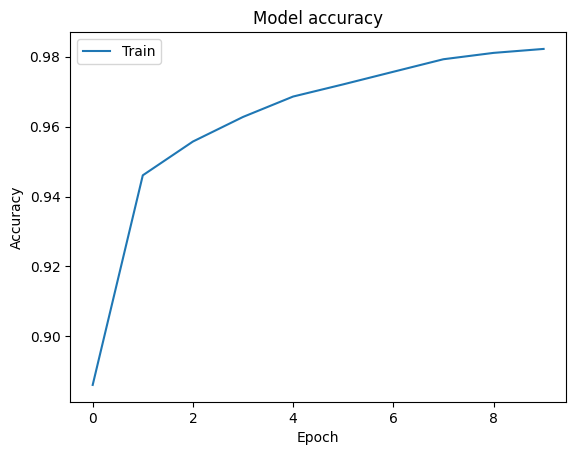

In [19]:
import matplotlib.pyplot as plt

# 繪製訓練 & 驗證集(若有)的準確率
plt.plot(history.history['accuracy'])
# plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

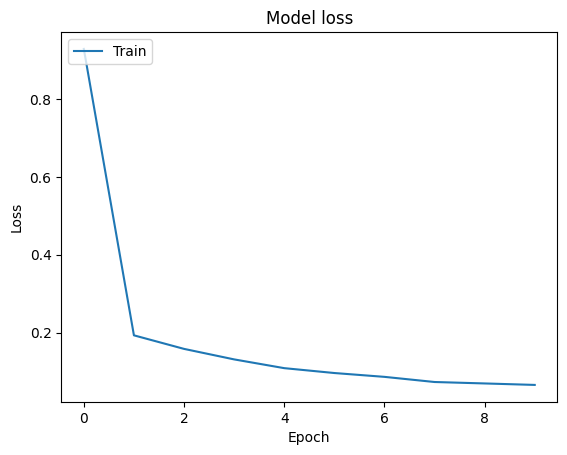

In [20]:
import matplotlib.pyplot as plt

# 繪製訓練 & 驗證集(若有)的損失值
plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()